<a href="https://colab.research.google.com/github/9-coding/DataScience/blob/main/california_housing_prices_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial dataset
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 ent

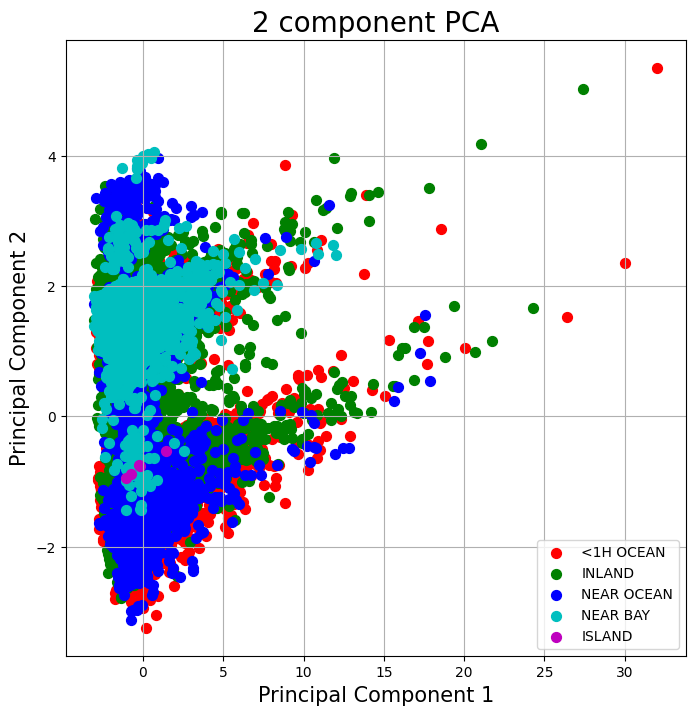

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("housing.csv")

# Check the data
print("Initial dataset")
print(data.head())
print(data.info())

from sklearn.preprocessing import StandardScaler
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Remove null value
df = data.dropna()

# Separate out the features
x = df.loc[:, features].values

# Separate out the target
y = df.loc[:,['ocean_proximity']].values  

# Standardize the features
x = StandardScaler().fit_transform(x)
d = pd.DataFrame(x, columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])

# Check the Standardize
print("\nStandardization\n")
print(x)
print(d.head())

# PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print('\nPCA Projection to 2D\n')
print(principalDf.head()) # Check

# Contcatenate DataFrame along Axis=1
finalDf = pd.concat([principalDf, df[['ocean_proximity']]], axis = 1)
print('\nContcatenate DataFrame along Axis=1\n')
print(finalDf.head()) # Check

# Visualize. Code to Plot the Graph
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# targets : 5 samples of 'ocean_proximity
targets = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['ocean_proximity'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()